In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
df = pd.read_csv(
    "C:\\Users\\prasa\\Downloads\\Kaggle Files\\Kaggle CSV Files\\Life_expectancy_dataset.csv", encoding='ISO-8859-1' )
# IPython.display allows nice output formatting within the Jupyter notebook
display(df.head())


,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [49]:
#RUN ONLY ONCE:

X = df
y = df.pop('Continent')

In [50]:
print(X.shape)
print(y.shape)

print(y.value_counts())

(223, 5)
(223,)
Africa           55
Europe           51
Asia             49
North America    34
Oceania          20
South America    14
Name: Continent, dtype: int64


In [51]:
for i in range(len(y)):
    if y[i] == 'Europe':
        y[i] = 0
    elif y[i] =='Asia':
        y[i] = 1
    elif y[i] =='North America':
        y[i] = 2
    elif y[i] =='Africa':
        y[i] = 3
    elif y[i] =='Oceania':
        y[i] = 4
    elif y[i] =='South America':
        y[i] = 5
    else:
        pass


C:\Users\prasa\AppData\Local\Temp\ipykernel_8640\986555380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
C:\Users\prasa\AppData\Local\Temp\ipykernel_8640\986555380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
C:\Users\prasa\AppData\Local\Temp\ipykernel_8640\986555380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 4
C:\Users\prasa\AppData\Local\Temp\ipykernel_8640\986555380.py:7: SettingWithCo

In [93]:
# Poping out the country column as it is a string and can later be linked
# with its respective Ranks. 
X = df.drop(['Country','Rank','Overall Life'],axis=1)
y = y.astype(int)

In [94]:
print(X)

     Male Life  Female Life
0         85.6         93.5
1         81.7         88.5
2         82.3         87.8
3         81.6         87.6
4         80.7         86.1
..         ...          ...
218       51.6         52.5
219       52.2         51.0
220       49.9         52.7
221       48.6         52.7
222       49.0         51.3

[223 rows x 2 columns]


#### Using the Linear models for multiclass classification:

In [95]:
print(X.columns)


Index(['Male Life', 'Female Life'], dtype='object')


In [96]:
#X = X.head(10)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=42)  


In [97]:
from sklearn.preprocessing import StandardScaler

#Using the standard scaler to scale the features for preprocessing:
#When using the standard scaler you do not need to manually scale the model.
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [98]:
#Logistic Regression model:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [99]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.4444444444444444

In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[8, 7, 0, 0, 0, 0],
       [0, 4, 0, 5, 0, 0],
       [3, 5, 0, 1, 0, 0],
       [0, 0, 0, 8, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0]], dtype=int64)

In [101]:
y_train.unique()

array([4, 5, 2, 0, 1, 3])

In [102]:
# Getting dataframe labels

from sklearn.utils.multiclass import unique_labels

print(unique_labels(y_test))

#This shows the y_train.unique(), but in accending order.


[0 1 2 3 4 5]


In [103]:
#Now, showing the confusion matrix with its proper labels in table format:

def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), columns=columns, index=index)

    return table

In [104]:
plot(y_test, y_pred)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 0,8,7,0,0,0,0
Actual 1,0,4,0,5,0,0
Actual 2,3,5,0,1,0,0
Actual 3,0,0,0,8,0,0
Actual 4,0,1,0,1,0,0
Actual 5,0,1,0,1,0,0


In [105]:
#Now for the heat map for the confusion matrix:

import seaborn as sns

def plot_heat(y_true, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), columns=columns, index=index)

    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<AxesSubplot:>

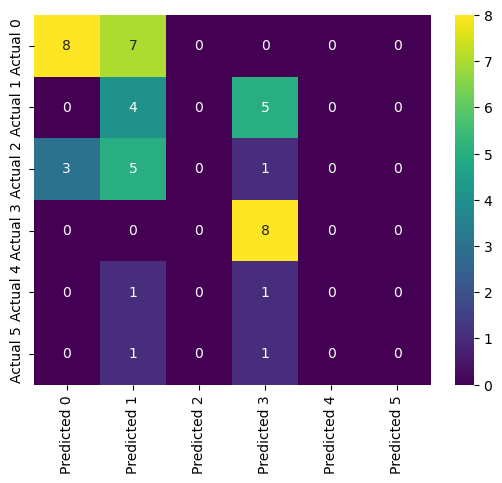

In [106]:
plot_heat(y_test, y_pred)

#### Analyzing Confusion matrix

In [107]:
#Using confusion matrix to calculate the precision, recall, accuracy score and f1-score.
#Calculate TP, TN, FP, FN.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.22      0.44      0.30         9
           2       0.00      0.00      0.00         9
           3       0.50      1.00      0.67         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.44        45
   macro avg       0.24      0.33      0.26        45
weighted avg       0.38      0.44      0.38        45



C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
import mglearn
import matplotlib as plt


In [161]:
X = df
print(X)

     Rank        Country  Overall Life  Male Life  Female Life
0       1         Monaco          89.5       85.6         93.5
1       2          Japan          85.0       81.7         88.5
2       3      Singapore          85.0       82.3         87.8
3       4   Macau; China          84.5       81.6         87.6
4       5     San Marino          83.3       80.7         86.1
..    ...            ...           ...        ...          ...
218   219          Gabon          52.1       51.6         52.5
219   220      Swaziland          51.6       52.2         51.0
220   221    Afghanistan          51.3       49.9         52.7
221   222  Guinea-Bissau          50.6       48.6         52.7
222   223           Chad          50.2       49.0         51.3

[223 rows x 5 columns]


In [162]:
print(X)

     Rank        Country  Overall Life  Male Life  Female Life
0       1         Monaco          89.5       85.6         93.5
1       2          Japan          85.0       81.7         88.5
2       3      Singapore          85.0       82.3         87.8
3       4   Macau; China          84.5       81.6         87.6
4       5     San Marino          83.3       80.7         86.1
..    ...            ...           ...        ...          ...
218   219          Gabon          52.1       51.6         52.5
219   220      Swaziland          51.6       52.2         51.0
220   221    Afghanistan          51.3       49.9         52.7
221   222  Guinea-Bissau          50.6       48.6         52.7
222   223           Chad          50.2       49.0         51.3

[223 rows x 5 columns]


In [174]:
print(X.columns[3])

Male Life


Text(0, 0.5, 'Female Life')

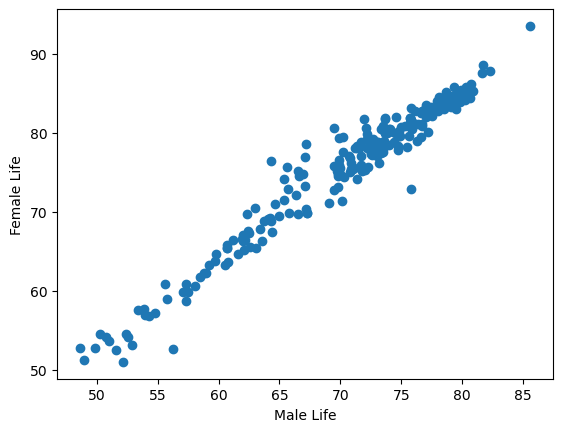

In [175]:
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.pyplot.scatter(X['Male Life'], X['Female Life'])

plt.pyplot.xlabel(X.columns[3])
plt.pyplot.ylabel(X.columns[4])


The Male Life and Female Life expectancy is linear regarding each countries.